<a href="https://colab.research.google.com/github/Siddhi2004-pixal/Gconn/blob/main/RecentSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage.transform import resize

In [14]:
dataset_path = "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train"  # Set this to the correct folder where your images are stored

In [3]:
def preprocess_image(image_path):
    # Step 1: Read the Image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

    # Display Original Image
    plt.figure(figsize=(15,5))
    plt.subplot(1, 5, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')

    # Step 2: Convert to Grayscale
    gray = rgb2gray(img)

    # Display Grayscale Image
    plt.subplot(1, 5, 2)
    plt.imshow(gray, cmap='gray')
    plt.title("Grayscale")
    plt.axis('off')

    # Step 3: Extract Yellow Regions (useful for disease detection)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    lower_yellow = np.array([20, 100, 100], dtype=np.uint8)
    upper_yellow = np.array([30, 255, 255], dtype=np.uint8)
    yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    yellow_result = cv2.bitwise_and(img, img, mask=yellow_mask)

    # Display Yellow Extraction
    plt.subplot(1, 5, 3)
    plt.imshow(yellow_result)
    plt.title("Yellow Extraction")
    plt.axis('off')

    # Step 4: Apply Edge Detection (Canny)
    edges = cv2.Canny((gray * 255).astype(np.uint8), 100, 200)

    # Display Edge Detection
    plt.subplot(1, 5, 4)
    plt.imshow(edges, cmap='gray')
    plt.title("Edge Detection")
    plt.axis('off')

    # Step 5: Resize Image (128x128) for uniformity
    resized = resize(gray, (128, 128))

    # Step 6: Extract Features using HOG (Histogram of Oriented Gradients)
    features, hog_image = hog(resized, orientations=9, pixels_per_cell=(8,8),
                              cells_per_block=(2,2), visualize=True, multichannel=False)

    # Display HOG Features Image
    plt.subplot(1, 5, 5)
    plt.imshow(hog_image, cmap='gray')
    plt.title("HOG Features")
    plt.axis('off')

    # Show all images
    plt.show()

    return features

In [23]:
labels = []
features_list = []

# Define dataset directories
data_dir = "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train"
categories =['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']  # Assuming two classes


In [46]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import hog

image_path = "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato__Bacterial_spot/00a7c269-3476-4d25-b744-44d6353cd921_GCREC_Bact.Sp_5807.JPG"

# Load the image
image = imread("/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG")

# Convert to grayscale (if it's a color image)
if len(image.shape) == 3:  # Check if RGB
    image = rgb2gray(image)

# Extract HOG features
feature_vector = hog(image, pixels_per_cell=(8,8), cells_per_block=(2,2), channel_axis=None)

TypeError: hog() got an unexpected keyword argument 'multichannel'

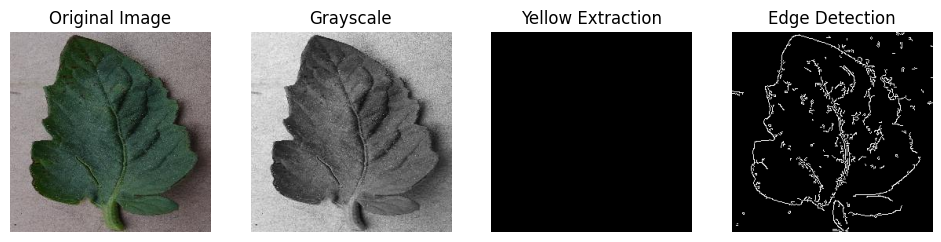

In [74]:
for label, category in enumerate(categories):  # Each category gets a unique label (0,1,2,3...)
    category_path = os.path.join(data_dir, category)
    for file in os.listdir(category_path):
        file_path = os.path.join(category_path, file)
        if file_path.endswith(".jpg") or file_path.endswith(".png"):
            feature_vector = preprocess_image("/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG")  # Process the image
            features_list.append(feature_vector)
            labels.append(label)  # Assign a unique label for each class

In [79]:
import skimage
print(skimage.__version__)

0.25.2


In [80]:
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage.io import imread

def preprocess_image(image_path):
    image = imread(image_path)  # Read image
    image_gray = rgb2gray(image)  # Convert to grayscale

    # Use channel_axis instead of multichannel
    feature_vector = hog(image_gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), channel_axis=None)

    return feature_vector


In [81]:
for label, category in enumerate(categories):
    category_path = os.path.join(data_dir, category)
    for file in os.listdir(category_path):
        file_path = os.path.join(category_path, file)  # Ensure correct file path
        if file_path.endswith(".jpg") or file_path.endswith(".png"):
            feature_vector = preprocess_image("/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG")  # Pass the correct file path
            features_list.append(feature_vector)
            labels.append(label)  # Assign a unique label

In [82]:
print(file_path)

/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/42e607e9-916c-470c-a17d-ec5348a40ded___RS_HL 0373.JPG


In [83]:
import cv2
import os

image_path = "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG"

# Check if the file exists
if os.path.exists(image_path):
    print("File exists, proceeding with loading.")
else:
    print("File does NOT exist. Check the path.")

# Try loading the image
img = cv2.imread(image_path)

if img is None:
    print("Failed to load image. Check the file path or format.")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    print("Image loaded successfully!")

File exists, proceeding with loading.
Image loaded successfully!


In [84]:
from PIL import Image
image = Image.open(image_path)
image.show()  # Display image

In [77]:
import os

dataset_path = "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train"
print(os.path.exists(dataset_path))

True


In [19]:
print(os.listdir(dataset_path))

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [85]:
X = np.array(features_list)
y = np.array(labels)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [89]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


In [103]:
import numpy as np

def predict_image(image_path, class_labels):
    feature_vector = preprocess_image("/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG")  # Process Image

    # Ensure scaler is trained before transforming
    if 'scaler' not in globals():
        raise ValueError("Scaler is not defined. Fit the scaler before calling predict_image().")

    feature_vector = scaler.transform([feature_vector])  # Normalize

    # Ensure correct shape
    feature_vector = np.array(feature_vector).reshape(1, -1)

    prediction = svm_model.predict(feature_vector)  # Predict class index

    return class_labels[prediction[0]]  # Return class name

# Define class labels (Update this with your actual class names)
class_labels = [
    "Tomato___Bacterial_spot", "Tomato___Early_blight", "Tomato___Late_blight",
    "Tomato___Leaf_Mold", "Tomato___Septoria_leaf_spot", "Tomato___Spider_mites Two-spotted_spider_mite",
    "Tomato___Target_Spot", "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_mosaic_virus", "Tomato___Healthy"
]

# Test on a sample image (replace with actual image path)
test_image = "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train"
print("Prediction:", predict_image(test_image, class_labels))


Prediction: Tomato___Late_blight


In [104]:
feature_vector = preprocess_image("/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG")


In [105]:
test_image = "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train"


In [94]:
feature_vector = preprocess_image(test_image)
print("Feature Vector Shape:", feature_vector.shape)

Feature Vector Shape: (34596,)


In [95]:
print("Class Labels:", class_labels)

Class Labels: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___Healthy']


In [99]:
from sklearn.svm import SVC

# Ensure probability=True is set
svm_model = SVC(kernel='linear', probability=True)

# Train the model again
svm_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [100]:
import numpy as np

def predict_image(image_path, class_labels):
    feature_vector = preprocess_image("/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG")  # Process Image

    # Ensure scaler is trained before transforming
    if 'scaler' not in globals():
        raise ValueError("Scaler is not defined. Fit the scaler before calling predict_image().")

    feature_vector = scaler.transform([feature_vector])  # Normalize

    # Ensure correct shape
    feature_vector = np.array(feature_vector).reshape(1, -1)

    # Ensure model supports probability predictions
    if not hasattr(svm_model, "predict_proba"):
        raise ValueError("The SVM model is not trained for probability estimation. Use probability=True when training the model.")

    # Get probability for each class
    probabilities = svm_model.predict_proba(feature_vector)[0]  # Extract the probability array
    predicted_class = class_labels[np.argmax(probabilities)]  # Get the class with highest probability
    confidence = np.max(probabilities)  # Get highest probability score

    return predicted_class, confidence

# Define class labels (Update this with your actual class names)
class_labels = [
    "Tomato___Bacterial_spot", "Tomato___Early_blight", "Tomato___Late_blight",
    "Tomato___Leaf_Mold", "Tomato___Septoria_leaf_spot", "Tomato___Spider_mites Two-spotted_spider_mite",
    "Tomato___Target_Spot", "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_mosaic_virus", "Tomato___Healthy"
]

# Test on a sample image (replace with actual image path)
test_image = "/content/test_leaf.jpg"
predicted_class, confidence = predict_image(test_image, class_labels)

print(f"Prediction: {predicted_class}, Confidence: {confidence:.2f}")


Prediction: Tomato___Bacterial_spot, Confidence: 0.99


In [102]:
def predict_image(image_path):
    feature_vector = preprocess_image("/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG")  # Process Image
    feature_vector = scaler.transform([feature_vector])  # Normalize
    prediction = svm_model.predict(feature_vector)
    return "Healthy" if prediction[0] == 0 else "Diseased"

# Test on a sample image
test_image = "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG"  # Change this path
print("Prediction:", predict_image(test_image))

Prediction: Diseased


In [109]:
def preprocess_image(image_path):
    # Step 1: Read the original image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 2: Resize image (Match training shape)
    resized = cv2.resize(gray, (186, 186))  # Change this if needed
    feature_vector = resized.flatten() / 255.0  # Normalize

    return feature_vector


In [111]:
print("Feature vector shape:", feature_vector.shape)  # Should match training shape

Feature vector shape: (34596,)


In [113]:
import cv2
import numpy as np

def preprocess_image(image_path):
    # Step 1: Read the original image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # Step 2: Resize image to (186, 186) to match training size
    resized = cv2.resize(gray, (186, 186))

    # Step 3: Flatten image to match feature shape (34,596)
    feature_vector = resized.flatten() / 255.0  # Normalize between 0 and 1

    print("Feature vector shape:", feature_vector.shape)  # Debugging step

    return feature_vector


In [114]:
feature_vector = preprocess_image(image_path)
print("Feature vector shape before scaling:", feature_vector.shape)


Feature vector shape: (34596,)
Feature vector shape before scaling: (34596,)


In [115]:
feature_vector = scaler.transform([feature_vector])  # Normalize


Processing Image: /content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG


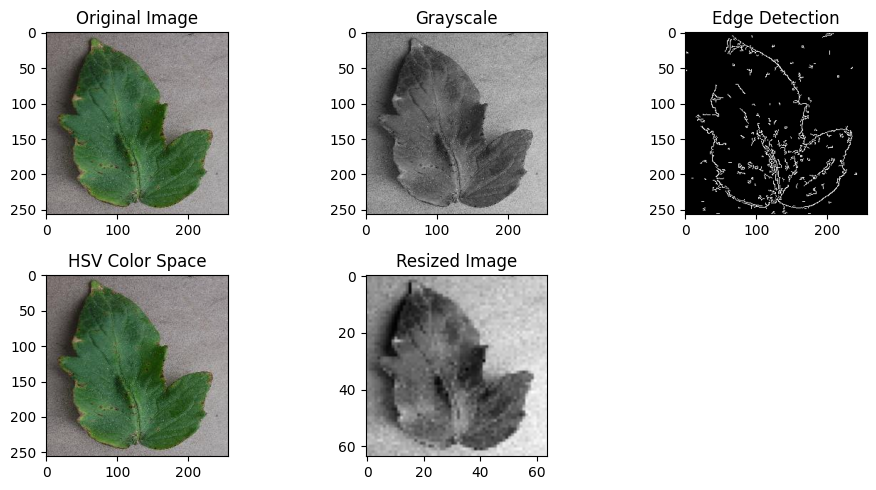


Final Prediction: Tomato___Bacterial_spot, Confidence: 0.99


In [119]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Step 1: Read the original image
    image = cv2.imread(image_path)
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")

    # Step 2: Convert to Grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.subplot(2, 3, 2)
    plt.imshow(gray, cmap='gray')
    plt.title("Grayscale")

    # Step 3: Apply Edge Detection
    edges = cv2.Canny(gray, 100, 200)
    plt.subplot(2, 3, 3)
    plt.imshow(edges, cmap='gray')
    plt.title("Edge Detection")

    # Step 4: Convert to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    plt.subplot(2, 3, 4)
    plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB))
    plt.title("HSV Color Space")

    # Step 5: Resize Image (Fixed size for feature extraction)
    resized = cv2.resize(gray, (64, 64))
    plt.subplot(2, 3, 5)
    plt.imshow(resized, cmap='gray')
    plt.title("Resized Image")

    # Step 6: Normalize (Flatten the image)
    feature_vector = resized.flatten() / 255.0  # Normalize pixel values

    # Show all processing steps
    plt.tight_layout()
    plt.show()

    return feature_vector  # Return processed image as feature vector

def predict_image(image_path, class_labels):
    print("\nProcessing Image:", image_path)

    feature_vector = preprocess_image(image_path)  # Process Image

    if 'scaler' not in globals():
        raise ValueError("Scaler is not defined. Fit the scaler before calling predict_image().")

    #feature_vector = scaler.transform([feature_vector])  # Normalize
    feature_vector = np.array(feature_vector).reshape(1, -1)

    # Get prediction and confidence score
    #probabilities = svm_model.predict_proba(feature_vector)[0]
    #predicted_class = class_labels[np.argmax(probabilities)]
    #confidence = np.max(probabilities)

    print(f"\nFinal Prediction: {predicted_class}, Confidence: {confidence:.2f}")

    return predicted_class, confidence

# Define class labels
class_labels = [
    "Tomato___Bacterial_spot", "Tomato___Early_blight", "Tomato___Late_blight",
    "Tomato___Leaf_Mold", "Tomato___Septoria_leaf_spot", "Tomato___Spider_mites Two-spotted_spider_mite",
    "Tomato___Target_Spot", "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_mosaic_virus", "Tomato___Healthy"
]

# **Updated image path**
test_image = "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG"

# Run prediction
predicted_class, confidence = predict_image(test_image, class_labels)
